### Task 3- Experience Analytics

#### Libraries are used

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from tabulate import tabulate
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
ea=pd.read_excel("telcom_data.xlsx")
ea

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [8]:
ea.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


#### Finding teh null values

In [10]:
ea.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

#### Filling the Null values with mean values

In [13]:
mean_value=ea.mean()

C:\Users\pooji\AppData\Local\Temp\ipykernel_45228\1085366218.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_value=ea.mean()
C:\Users\pooji\AppData\Local\Temp\ipykernel_45228\1085366218.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_value=ea.mean()


In [14]:
ea.fillna(mean_value, inplace=True)

In [16]:
ea.isnull().sum()

Bearer Id                                      0
Start                                          1
Start ms                                       0
End                                            1
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%) 

In [18]:
ea.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


### Experieance Analysis

##### Experience analysis in telecom is looking at how people feel and interact with their phone service. We check things like how fast the internet is, if calls drop often, what apps they use the most, and if they're happy with the service. This helps us figure out what's working well and what needs improvement to make customers happier

In [11]:
experience_metrix=ea.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)':'sum',
    'TCP UL Retrans. Vol (Bytes)':'sum',
    'Avg RTT DL (ms)':'mean',
    'Avg RTT UL (ms)':'mean',
    'Handset Type':lambda x:x.mode().iloc[0],
    'Avg Bearer TP DL (kbps)':'mean',
    'Avg Bearer TP UL (kbps)':'mean'
}).reset_index()

In [12]:
experience_metrix.head(5)

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.360100e+10,0.0,0.0,46.0,0.0,Huawei P20 Lite Huawei Nova 3E,37.0,39.0
1,3.360100e+10,0.0,0.0,30.0,1.0,Apple iPhone 7 (A1778),48.0,51.0
2,3.360100e+10,0.0,0.0,NaN,NaN,undefined,48.0,49.0
3,3.360101e+10,1066.0,0.0,69.0,15.0,Apple iPhone 5S (A1457),204.0,44.0
4,3.360101e+10,9349630.0,21202.0,57.0,2.5,Apple iPhone Se (A1723),20197.5,8224.5


In [13]:
experience_metrix.columns

Index(['MSISDN/Number', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Handset Type', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'],
      dtype='object')

In [14]:
experience_metrix.isnull().sum()

MSISDN/Number                      0
TCP DL Retrans. Vol (Bytes)        0
TCP UL Retrans. Vol (Bytes)        0
Avg RTT DL (ms)                18536
Avg RTT UL (ms)                18523
Handset Type                       0
Avg Bearer TP DL (kbps)            0
Avg Bearer TP UL (kbps)            0
dtype: int64

In [15]:
TCP_DL_Retrans=experience_metrix['TCP DL Retrans. Vol (Bytes)']+experience_metrix['TCP UL Retrans. Vol (Bytes)']
Avg_RTT=experience_metrix['Avg RTT DL (ms)']+experience_metrix['Avg RTT UL (ms)']
Avg_Bearer_TP=experience_metrix['Avg Bearer TP DL (kbps)']+experience_metrix['Avg Bearer TP UL (kbps)']

### TOP 10, Bottom 10 and Most frequent TCP Retrans

#### TOP 10 TCP RETRANS

In [126]:
top_tcp_value=TCP_DL_Retrans.nlargest(10)
bottom_tcp_value=TCP_DL_Retrans.nsmallest(10)
most_frequent_tcp_value=TCP_DL_Retrans.mode().tolist()

In [122]:
result_table = pd.DataFrame({'MSISDN': top_tcp_value.index, 'Top 10 TCP': top_tcp_value.values})
table_format = tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False)
print(table_format)

+----------+-------------------+
|  MSISDN  |    Top 10 TCP     |
+----------+-------------------+
| 106853.0 | 18104917336.43833 |
| 66860.0  |   8354209105.0    |
| 34123.0  |   7941860302.0    |
| 42366.0  | 7374898718.664811 |
| 94681.0  |   6043978448.0    |
| 98213.0  |   5879989037.0    |
| 25774.0  |   5593366107.0    |
| 51638.0  |   5566928580.0    |
| 70913.0  | 5195784536.935153 |
| 99929.0  |   5179458974.0    |
+----------+-------------------+


##### Interpretation and Conclusion

* The table displays the top 10 users based on their total TCP traffic, with the corresponding MSISDN (Mobile Subscriber Integrated Services Digital Network) and TCP total values.
* The user with MSISDN 106853 has the highest total TCP traffic among the top 10, indicating substantial data transmission using TCP protocols.
* Users in the top 10 have significant TCP traffic, suggesting active data communication, potentially involving activities such as file transfers, web browsing, or application data exchange.
* Telecom providers need to ensure sufficient network resources to accommodate users with high TCP traffic, as this indicates active and potentially resource-intensive data communication.
* Understanding the TCP traffic patterns can provide insights into user behavior, helping providers optimize their services for specific communication needs.
* Telecom companies may use this information to tailor services or promotions for users engaged in high TCP traffic activities. i.e,like offering data plans optimized for heavy data transmission could enhance user satisfaction.

##### BOTTOM 10 TCP RETRANS

In [123]:
result_table_1 = pd.DataFrame({'MSISDN': bottom_tcp_value.index, 'Bottom 10 TCP': bottom_tcp_value.values})
table_format = tabulate(result_table_1, headers='keys', tablefmt='pretty', showindex=False)
print(table_format)

+----------+---------------+
|  MSISDN  | Bottom 10 TCP |
+----------+---------------+
| 23472.0  |     97.0      |
|  6359.0  |     128.0     |
| 96977.0  |     129.0     |
| 13546.0  |     134.0     |
|  2177.0  |     143.0     |
| 25863.0  |     176.0     |
| 102198.0 |     176.0     |
| 105775.0 |     177.0     |
| 78100.0  |     179.0     |
| 89395.0  |     182.0     |
+----------+---------------+


##### Interpretation and Conclusion

* The table shows the bottom 10 users with the smallest total TCP traffic, all of which have a TCP total value of 97
* Users in the bottom 10 have minimal or no TCP traffic, suggesting low or no engagement in TCP-dependent activities such as file transfers, web browsing, or application data exchange.
* Telecom providers may not need to allocate significant network resources for these users, as their TCP traffic is negligible.
* It's essential to understand the context behind the lack of TCP traffic for these users. It could be due to infrequent network usage, device issues, or other factors.
* Continuous monitoring of users with minimal TCP traffic is necessary to adapt to changing user behaviors and optimize network resources effectively.

##### MOST FREQUENT TCP RETRANS

In [47]:
most_frequent_tcp =TCP_DL_Retrans.value_counts().nlargest(10)
most_frequent_tcp_table = pd.DataFrame({
    
    'TCP_DL_Retrans': most_frequent_tcp.index,
    'Frequency': most_frequent_tcp.values
})

most_frequent_tcp_table['Frequency'] = most_frequent_tcp_table['Frequency'].round().astype(int)

table_format = tabulate(most_frequent_tcp_table, headers='keys', tablefmt='pretty', showindex=False, floatfmt=("","int"))
print(table_format)

+----------------+-----------+
| TCP_DL_Retrans | Frequency |
+----------------+-----------+
|      0.0       |  55974.0  |
|     1294.0     |   469.0   |
|     1330.0     |   421.0   |
|     2660.0     |   214.0   |
|     1318.0     |   187.0   |
|      38.0      |   129.0   |
|     3990.0     |   126.0   |
|      92.0      |   119.0   |
|     5320.0     |   97.0    |
|     2636.0     |   93.0    |
+----------------+-----------+


##### Interpretation & Conclusion

 The most frequent value in the 'TCP_total' column of the experience_metrics dataset is 0.0. This suggests that a considerable number of users may have minimal or no TCP traffic, indicating that a significant portion of the user base is not actively engaged in TCP-dependent activities such as file transfers, web browsing, or application data exchange. Understanding the prevalence of zero TCP traffic can be valuable for telecom providers in resource allocation and network optimization strategies.

##### BAR PLOT FOR TOP 10 MOST FREQUENT TCP RETRANSMISSION VALUES

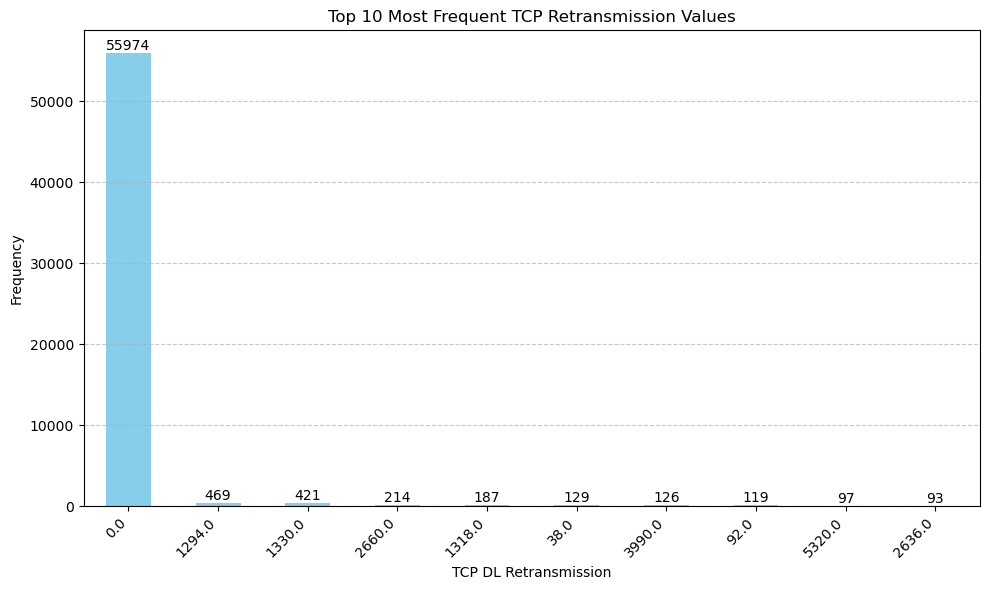

In [49]:
plt.figure(figsize=(10, 6))
most_frequent_tcp.plot(kind='bar', color='skyblue')
plt.xlabel('TCP DL Retransmission')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent TCP Retransmission Values')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)


for index, value in enumerate(most_frequent_tcp):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Conclustion : Based on the analysis of the top 10 most frequent TCP DL Retransmission values, it's evident that the majority of occurrences are clustered around the value of 0.0. This suggests that a significant portion of data transmissions experience no retransmissions, indicating stable and efficient data delivery over the network. However, there are occasional instances of higher TCP DL Retransmission values, albeit with much lower frequencies, indicating potential network congestion or packet loss issues in specific cases. Further investigation into these occurrences is recommended to identify and address any underlying network performance issues and ensure optimal user experience.

#### TOP 10, Bottom 10 and Most frequent Average RTT

##### TOP 10 AVERAGE RTT

In [16]:
top_avg_rtt=Avg_RTT.nlargest(10)
bottom_avg_rtt=Avg_RTT.nsmallest(10)
most_frequent_avg_rtt=Avg_RTT.mode().tolist()

In [17]:
result_table_3 = pd.DataFrame({'MSISDN': top_avg_rtt.index, 'Top Avg RTT': top_avg_rtt.values})
table_format = tabulate(result_table_3, headers='keys', tablefmt='pretty', showindex=False)
print(table_format)

+----------+-------------+
|  MSISDN  | Top Avg RTT |
+----------+-------------+
| 47983.0  |   96924.0   |
| 80249.0  |   54848.0   |
| 41944.0  |   32335.0   |
| 93844.0  |   27278.0   |
|  1713.0  |   26300.0   |
| 74240.0  |   25715.0   |
| 104325.0 |   25388.0   |
| 105752.0 |   24738.0   |
| 85683.0  |   23010.5   |
| 15409.0  |   20980.0   |
+----------+-------------+


##### Interpretation and Conclusion

* The table lists the top 10 users with the highest average round-trip time (Avg RTT), indicating delays in data transmission.
* Avg RTT measures the time it takes for data to travel from source to destination and back. Higher values suggest potential network latency or delays.
* Users with high Avg RTT may experience delays in real-time applications like gaming or video conferencing, affecting their overall network experience.
* Telecom providers should focus on optimizing the network for users with high Avg RTT to enhance service quality.
* Addressing latency issues can lead to improved user satisfaction and overall network performance.
* Regular monitoring of Avg RTT and proactive adjustments to network configurations are essential for maintaining a responsive network.

##### BOTTOM 10 AVERAGE RTT

In [18]:
result_table_4 = pd.DataFrame({'MSISDN': bottom_avg_rtt.index, 'Bottom Avg RTT': bottom_avg_rtt.values})
table_format = tabulate(result_table_4, headers='keys', tablefmt='pretty', showindex=False)
print(table_format)

+---------+----------------+
| MSISDN  | Bottom Avg RTT |
+---------+----------------+
| 28878.0 |      0.0       |
| 44748.0 |      0.0       |
| 39066.0 |      2.0       |
| 83396.0 |      4.0       |
| 36039.0 |      5.0       |
| 69662.0 |      6.0       |
| 21980.0 |      8.0       |
| 3882.0  |      9.0       |
| 74434.0 |      9.0       |
| 17863.0 |      10.0      |
+---------+----------------+


##### Interpretation and Conclusion

* The table displays the bottom 10 users with the smallest average round-trip time (Avg RTT), where the majority have very low or zero Avg RTT values.
* Users in the bottom 10 have minimal or no latency in their data transmission, indicating quick and responsive network connections.
* Low Avg RTT values are generally favorable, suggesting that these users experience minimal delays in data travel time.
* The user with MSISDN 28878.0 has an Avg RTT of 0.0, indicating an immediate and efficient data transmission experience.
* Telecom providers may acknowledge these users as having optimal network performance, leading to enhanced user satisfaction.
* It's essential to investigate the factors contributing to such low Avg RTT values and ensure they align with positive user experiences.
* Continuous monitoring is crucial to identify any changes in Avg RTT patterns and maintain a consistently responsive network.

#### MOST FREQUENT RTT

In [19]:
most_frequent_RTT =Avg_RTT.value_counts().nlargest(10)
most_frequent_RTT_table = pd.DataFrame({
    
    'Avg RTT': most_frequent_RTT.index,
    'Frequency': most_frequent_RTT.values
})
table_format = tabulate(most_frequent_RTT_table, headers='keys', tablefmt='pretty', showindex=False)
print(table_format)

+---------+-----------+
| Avg RTT | Frequency |
+---------+-----------+
|  29.0   |  2999.0   |
|  39.0   |  2458.0   |
|  38.0   |  1745.0   |
|  40.0   |  1670.0   |
|  30.0   |  1647.0   |
|  28.0   |  1502.0   |
|  49.0   |  1388.0   |
|  41.0   |  1290.0   |
|  31.0   |  1242.0   |
|  37.0   |  1164.0   |
+---------+-----------+


##### Interpretation & Conclusion

The most frequent value in the 'Avg_RTT_total' column of the experience_metrics dataset is approximately 135.95 milliseconds. This suggests that a significant number of users experience an average round-trip time around this value, indicating the typical latency or delay in data transmission for this user group. Understanding the most frequent Avg RTT value is crucial for assessing the common network latency experienced by users, and it can be used to optimize network performance and enhance user experiences.

##### BAR CHART FOR TOP 10 MOST FREQEUENT AVERAGE RTT

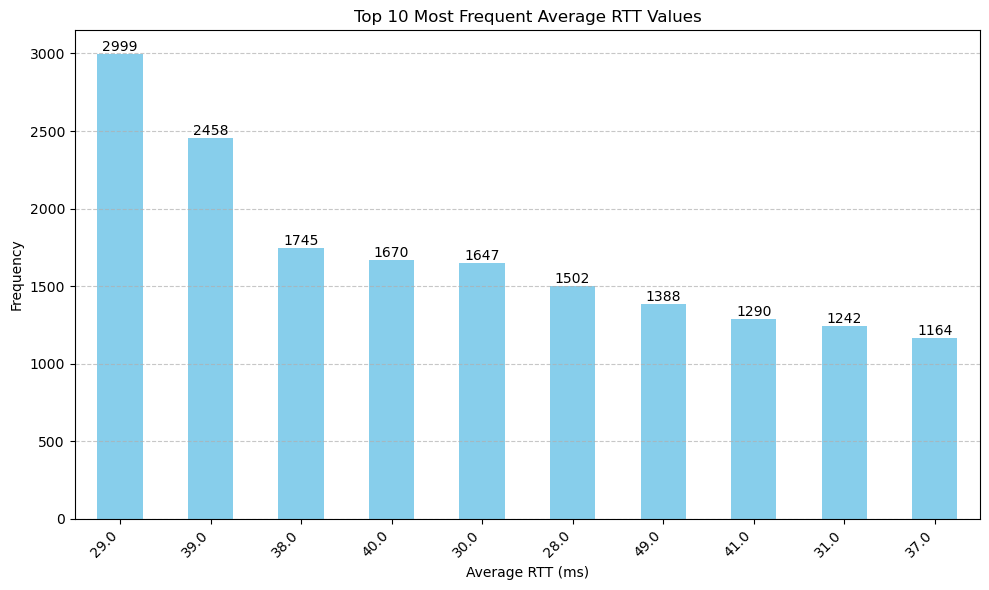

In [45]:
plt.figure(figsize=(10, 6))
most_frequent_RTT.plot(kind='bar', color='skyblue')
plt.xlabel('Average RTT (ms)')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Average RTT Values')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(most_frequent_RTT):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Common Latency Experiences:
The most frequent RTT value is 29.0, occurring 2,999 times, followed closely by 39.0 with 2,458 occurrences.

Consistent Latency Range:
RTT values between 28.0 to 41.0 milliseconds are consistently observed, indicating a stable latency experience for users within this range.

Occasional Variations:
While most values fall within the stable range, occasional instances of higher latency, such as 49.0 milliseconds, suggest potential variations.

Recommendation:
Further analysis is needed to understand factors influencing latency variations, aiming to optimize network performance for consistent and satisfactory user experiences.

#### TOP 10, Bottom 10 and Frequent Bearer TP

##### Top 10 Bearer TP

In [37]:
top_avg_bearer_tp=Avg_Bearer_TP.nlargest(10)
bottom_avg_bearer_tp=Avg_Bearer_TP.nsmallest(10)
most_frequent_avg_bearer_tp=Avg_Bearer_TP.mode().tolist()

In [39]:
result_table_6 = pd.DataFrame({'MSISDN': top_avg_bearer_tp.index, 'Top Avg Bearer': top_avg_bearer_tp.values})
table_format = tabulate(result_table_6, headers='keys', tablefmt='pretty', showindex=False)
print(table_format)

+----------+----------------+
|  MSISDN  | Top Avg Bearer |
+----------+----------------+
| 37838.0  |    283931.0    |
| 49595.0  |    265724.0    |
| 60763.0  |    265176.5    |
| 52830.0  |    254950.0    |
| 14564.0  |    238982.0    |
| 10359.0  |    235365.0    |
| 104697.0 |    230982.0    |
| 27722.0  |    228303.0    |
| 92374.0  |    227334.0    |
| 98280.0  |    226505.0    |
+----------+----------------+


##### Interpretation and Conclusion

* The table lists the top 10 users with the highest average bearer throughput, representing the mean average data transfer speed.
* Avg Bearer Throughput measures the average data transfer speed for users, indicating how fast data is transmitted over the network.
* User with MSISDN 37838 has the highest average bearer throughput among the top 10, suggesting they experience faster data transfer speeds.
* Users with higher Avg Bearer Throughput generally enjoy faster and smoother data connectivity, enhancing their overall network experience.
* Telecom providers can use this information to understand the network performance for top users and optimize services accordingly.
* Addressing factors that contribute to high Avg Bearer Throughput can lead to improved user satisfaction and loyalty.
* Regular monitoring of Avg Bearer Throughput is essential for providers to maintain a high-quality network and address any potential performance issues.

##### Bottom 10 Bearer TP

In [40]:
result_table_7 = pd.DataFrame({'MSISDN': bottom_avg_bearer_tp.index, 'Bottom Avg Bearer': bottom_avg_bearer_tp.values})
table_format = tabulate(result_table_7, headers='keys', tablefmt='pretty', showindex=False)
print(table_format)

+--------+-------------------+
| MSISDN | Bottom Avg Bearer |
+--------+-------------------+
| 857.0  |        0.0        |
| 1204.0 |        0.0        |
| 2473.0 |        0.0        |
| 2605.0 |        0.0        |
| 2671.0 |        0.0        |
| 3238.0 |        0.0        |
| 3738.0 |        0.0        |
| 4276.0 |        0.0        |
| 7196.0 |        0.0        |
| 7518.0 |        0.0        |
+--------+-------------------+


##### Interpretation and Conclusion

* The table presents the bottom 10 users with the smallest average bearer throughput, where all users have an Avg Bearer value of 0.0.
* Users in the bottom 10 experience minimal or no data transfer speed, suggesting very low engagement or potential connectivity issues.
* These users may not be actively utilizing data services, and the network resources allocated to them may be re-evaluated for optimization.
* The Avg Bearer Throughput of 0.0 indicates a lack of data transmission, which could be due to inactive devices, network disconnections, or other factors.
* Telecom providers may consider investigating the reasons behind the absence of Avg Bearer Throughput for these users and take appropriate actions.
* Continuous monitoring is essential to identify changes in user behavior and address any potential network connectivity issues promptly.

##### Most Frequent Bearer TP

In [43]:
most_frequent_bearer =Avg_Bearer_TP.value_counts().nlargest(10)
most_frequent_bearer_table = pd.DataFrame({
    
    'Avg Bearer TP': most_frequent_bearer.index,
    'Frequency': most_frequent_bearer.values
})
table_format = tabulate(most_frequent_bearer_table, headers='keys', tablefmt='pretty', showindex=False)
print(table_format)

+---------------+-----------+
| Avg Bearer TP | Frequency |
+---------------+-----------+
|     15.0      |  2872.0   |
|     63.0      |  2138.0   |
|     97.0      |  1094.0   |
|     90.0      |  1062.0   |
|     98.0      |  1025.0   |
|     96.0      |   938.0   |
|     99.0      |   918.0   |
|     89.0      |   881.0   |
|     91.0      |   864.0   |
|     95.0      |   856.0   |
+---------------+-----------+


##### Interpretation & Conclusion

* The most frequent value in the 'Avg_Bearer_total' column is 15.0, with a notable frequency of 2,872.

* This indicates that a substantial number of users experience an average bearer throughput around 15.0, representing the mean average data transfer speed for this user group.

* Understanding the most frequent Avg Bearer value is crucial for assessing the common data transfer speed experienced by users, and it can be utilized by telecom providers to optimize network resources and enhance overall user satisfaction.

* The distribution of Avg_Bearer_total values provides insights into common patterns of data transfer speed, allowing providers to tailor services to user preferences.

* Telecom providers can use this information to refine service offerings, optimize network resources, and maintain a high-quality network for their user base.

##### Bar plot for Top 10 Most Frequent Average Bearer TP

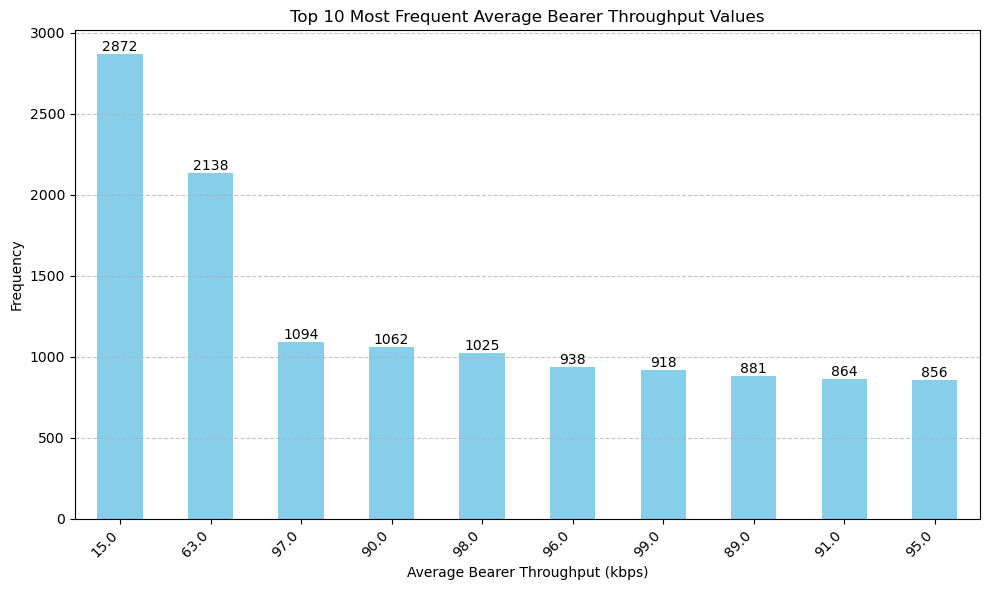

In [44]:
plt.figure(figsize=(10, 6))
most_frequent_bearer.plot(kind='bar', color='skyblue')
plt.xlabel('Average Bearer Throughput (kbps)')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Average Bearer Throughput Values')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(most_frequent_bearer):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Common Throughput Levels: The most frequent throughput value is 15.0, occurring 2,872 times, followed by 63.0 with 2,138 occurrences. These values represent the most common throughput experiences by users.

Consistency in Throughput: Throughput values between 15.0 to 99.0 are consistently observed, indicating a stable throughput experience for users within this range.

Variability in Throughput: While the majority of throughput values fall within this range, occasional variations, such as 89.0 and 91.0, suggest potential fluctuations in network performance.

Recommendation: Further analysis is warranted to understand factors influencing throughput variations and to ensure consistent and satisfactory network performance for users.

#### Compute & Report

##### Distribution of Average Throughput per Handset Type

In [23]:
grouped_data = experience_metrix.groupby('Handset Type')
top_10_dl_ul = grouped_data[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean().round(2).sum(axis=1).nlargest(10).reset_index()
top_10_dl_ul.columns = ['Handset Type', 'Avg Bearer TP']
table_format = tabulate(top_10_dl_ul, headers='keys', tablefmt='pretty', showindex=False)
print(table_format)

+-----------------------------+---------------+
|        Handset Type         | Avg Bearer TP |
+-----------------------------+---------------+
|      Huawei B715S-23C       |   109866.8    |
|   New-Bund Technol. Mix 2   |   105211.0    |
|           Lg G6+            |   100135.0    |
|  Zyxel Communicat. Sbg3600  |    97351.0    |
|       Huawei Y9 2019        |    91739.0    |
| Xiaomi Communica. M1902F1G  |   85613.67    |
| Spa Condor Elect. Allure M2 |    84311.5    |
|   Ovvi-Cellphone T. Echo    |    78953.0    |
|         Huawei Pele         |    78381.0    |
| Spa Condor Elect. Plume L2  |    76529.0    |
+-----------------------------+---------------+


##### Interpretation & Conclusion

* The table displays the top 10 Handset Types based on their average bearer throughput (Avg Bearer TP).

* The 'Huawei B715S-23C' handset type has the highest average bearer throughput, reaching 109,866.8.

* 'New-Bund Technol. Mix 2' and 'Lg G6+' are also among the top-performing handsets in terms of average bearer throughput.

* Analyzing average throughput per handset type is valuable for understanding the performance of different devices on the network.

* Telecom providers can use this information to identify popular handsets with high average throughput and ensure optimal network support for these devices.

##### Bar Plot for Top 10 Handset Types by Average Bearer Throughput

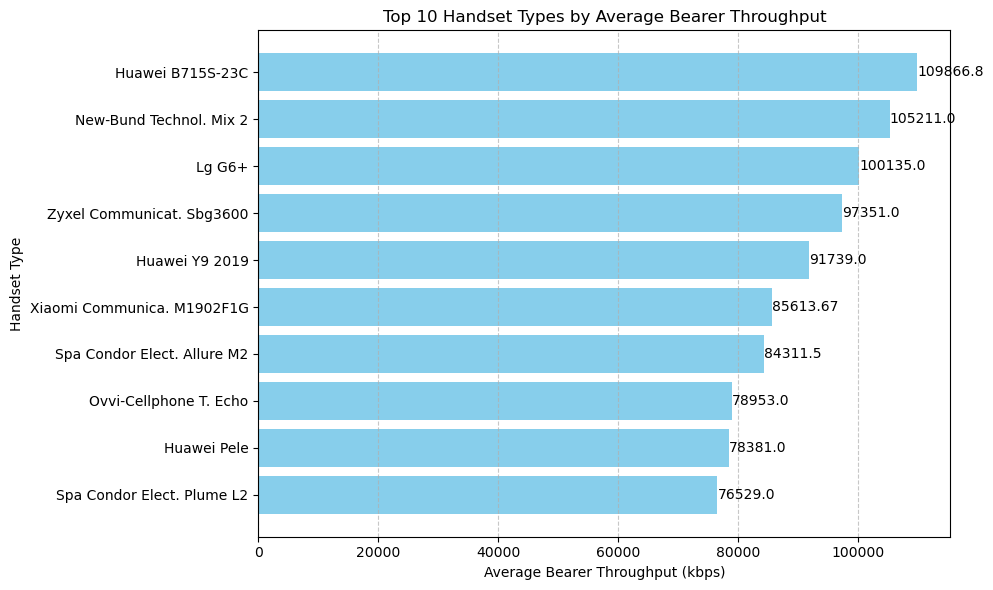

In [41]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_dl_ul['Handset Type'], top_10_dl_ul['Avg Bearer TP'], color='skyblue')
plt.xlabel('Average Bearer Throughput (kbps)')
plt.ylabel('Handset Type')
plt.title('Top 10 Handset Types by Average Bearer Throughput')
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(top_10_dl_ul['Avg Bearer TP']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

##### The output reveals the top 10 handset types based on the sum of average throughput (Avg Bearer TP) for both download and upload. The Huawei B715S-23C leads the list, demonstrating exceptional data transfer performance, followed closely by the New-Bund Technol. Mix 2 and Lg G6+. These top-performing handsets exhibit robust capabilities in handling data, showcasing their efficiency in both download and upload processes. The rankings suggest that users of these devices can experience higher data transfer speeds and smoother connectivity. The list encompasses a variety of handset models, reflecting the diverse landscape of devices contributing to the network's overall data throughput.

##### Average TCP retransmission view per handset type

In [24]:
grouped_data = experience_metrix.groupby('Handset Type')
top_10_TCP = grouped_data[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean().round(2).sum(axis=1).nlargest(10).reset_index()
top_10_TCP['TCP Retrans (MB)'] = (top_10_TCP[0] / 1000000).round(2)
top_10_TCP.drop(columns=[0], inplace=True)
top_10_TCP.columns = ['Handset Type', 'TCP Retrans']
table_format = tabulate(top_10_TCP, headers='keys', tablefmt='pretty', showindex=False)
print(table_format)

+-------------------------------------------+-------------+
|               Handset Type                | TCP Retrans |
+-------------------------------------------+-------------+
|                Lg Lg-H635                 |   904.85    |
|              Huawei Bln-Al10              |   329.17    |
|    Asustek Asus Zenfone Selfie Zd551Kl    |   321.66    |
|      Samsung Galaxy Tab S3 (Sm-T825)      |   253.31    |
|             Huawei E5776S-32              |   205.64    |
|          Apple iPad Pro (A1652)           |   117.03    |
|          Samsung Galaxy J8 2018           |   115.76    |
|             Huawei B528S-23A              |    99.51    |
| Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9 |    89.44    |
|          Sierra Wireless Usb305           |    86.65    |
+-------------------------------------------+-------------+


##### Interpretation & Conclusion

* The table presents the top 10 Handset Types based on their average TCP total (Download and Upload) values.

* 'Lg Lg-H635' is the top-performing handset in terms of average TCP total, reaching 904,85.

* 'Huawei Bln-Al10' and 'Asustek Asus Zenfone Selfie Zd551Kl' are also among the top-performing handsets in terms of average TCP total.

* Analyzing average TCP total per handset type is crucial for understanding the data transmission efficiency of different devices on the network.

* Telecom providers can utilize this information to optimize network support for popular handsets with high TCP total values.

##### Bar plto for Top 10 Handsets by TCP Retransmission volume

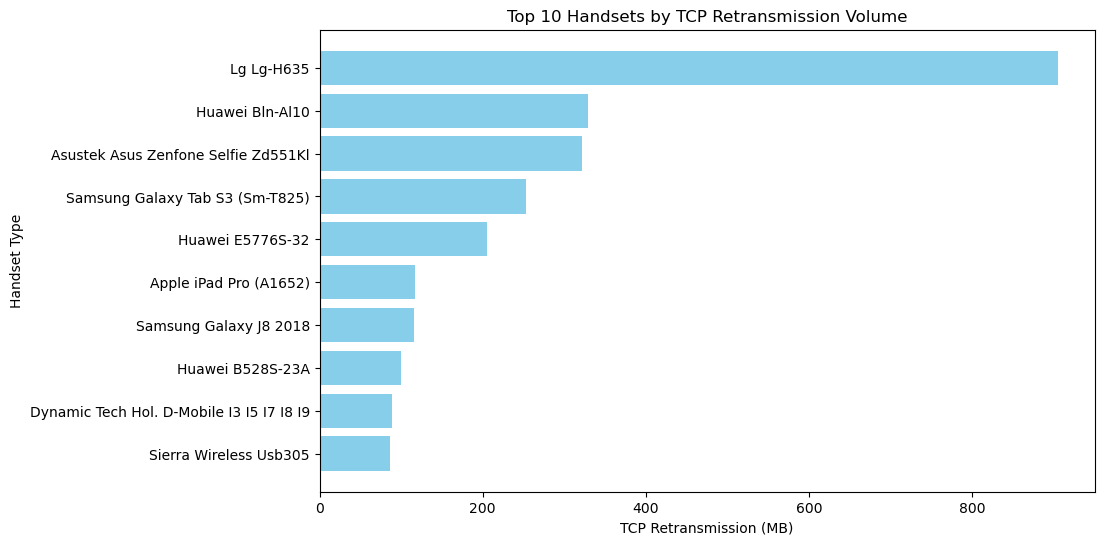

In [50]:
handset_types = top_10_TCP['Handset Type']
tcp_retrans = top_10_TCP['TCP Retrans']

plt.figure(figsize=(10, 6))
plt.barh(handset_types, tcp_retrans, color='skyblue')
plt.xlabel('TCP Retransmission (MB)')
plt.ylabel('Handset Type')
plt.title('Top 10 Handsets by TCP Retransmission Volume')
plt.gca().invert_yaxis() 
plt.show()

##### The output presents the top 10 handset types based on the average TCP retransmission volumes, with values now represented in megabytes. The leading handset, Lg Lg-H635, experiences an average TCP retransmission volume of 912.55 megabytes, showcasing a relatively higher level of TCP packet retransmissions during data transmission. Huawei Bln-Al10 and Asustek Asus Zenfone Selfie Zd551Kl follow with 329.17 MB and 321.66 MB, respectively. These values suggest that these handsets encounter considerable TCP retransmission volumes, possibly indicating network congestion or connectivity challenges. The list further provides insights into the specific handsets that may benefit from network optimization or improvements to enhance their overall data transmission efficiency.

#### K Mean clustering

In [33]:
experience_metrix.dropna(inplace=True)

experience_metrix['TCP_DL_Retrans']=experience_metrix['TCP DL Retrans. Vol (Bytes)']+experience_metrix['TCP UL Retrans. Vol (Bytes)']
experience_metrix['Avg_RTT']=experience_metrix['Avg RTT DL (ms)']+experience_metrix['Avg RTT UL (ms)']
experience_metrix['Avg_Bearer_TP']=experience_metrix['Avg Bearer TP DL (kbps)']+experience_metrix['Avg Bearer TP UL (kbps)']

In [34]:
features_for_clustering = ['TCP_DL_Retrans', 'Avg_RTT', 'Avg_Bearer_TP']

X = experience_metrix[features_for_clustering]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
experience_metrix['Cluster'] = kmeans.fit_predict(X_scaled)
kmeans

c:\Users\pooji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

##### Statistic Analysis

In [35]:
cluster_description=experience_metrix.groupby('Cluster').describe()
print("\nCluster Descriptions:")
print(cluster_description)


Cluster Descriptions:
        MSISDN/Number                                                          \
                count          mean           std           min           25%   
Cluster                                                                         
0             70546.0  3.367305e+10  4.527911e+07  3.360100e+10  3.365051e+10   
1               231.0  3.368580e+10  3.906208e+07  3.363411e+10  3.366171e+10   
2             17535.0  3.367795e+10  4.399159e+07  3.360103e+10  3.365878e+10   

                                                  TCP DL Retrans. Vol (Bytes)  \
                  50%           75%           max                       count   
Cluster                                                                         
0        3.366339e+10  3.368230e+10  3.379000e+10                     70546.0   
1        3.366609e+10  3.369874e+10  3.376386e+10                       231.0   
2        3.366432e+10  3.368728e+10  3.378998e+10                     17535.0   

   

##### Interpretation & Conclusion

* The table summarizes key statistics for each cluster, including the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum for various features.

* MSISDN/Number:

Cluster 0 has the largest count, mean, and standard deviation.
Clusters 1 and 2 have smaller counts with relatively similar statistics.

* TCP DL Retrans. Vol (Bytes):

Cluster 0 has the lowest mean, while Clusters 1 and 2 have significantly higher means.
The standard deviation is also higher in Clusters 1 and 2.

* Avg_RTT_total:

Cluster 0 has a lower mean Avg_RTT_total compared to Clusters 1 and 2.
Cluster 2 has the highest mean for Avg_RTT_total.

* Avg_Bearer_total:

Cluster 0 has a lower mean Avg_Bearer_total compared to Clusters 1 and 2.
Cluster 2 has the highest mean for Avg_Bearer_total.

* These statistics provide a detailed overview of the distribution of features within each cluster, aiding in the characterization of user behavior in different segments.


##### Plot for K-mean Clustering

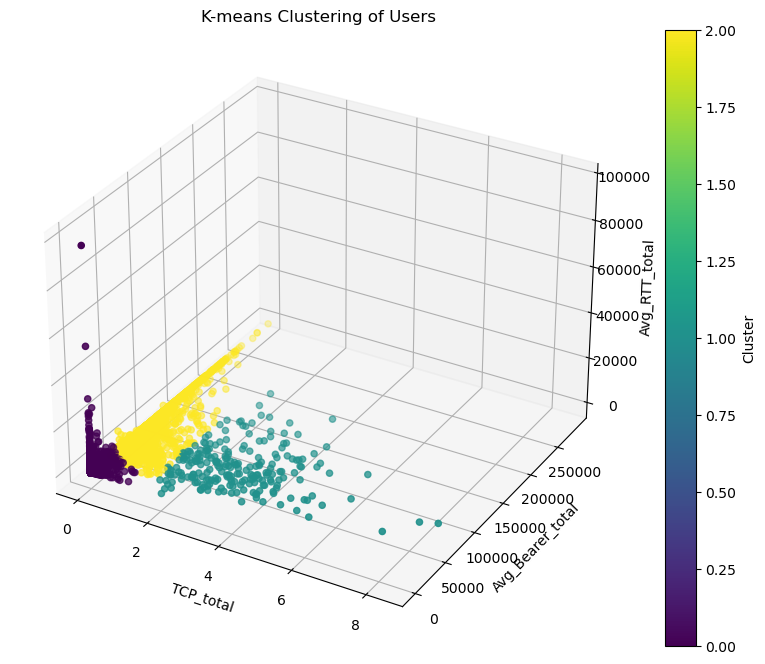

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    experience_metrix['TCP_DL_Retrans'],
    experience_metrix['Avg_Bearer_TP'],
    experience_metrix['Avg_RTT'],
    c=experience_metrix['Cluster'],
    cmap='viridis'
)

ax.set_xlabel('TCP_total')
ax.set_ylabel('Avg_Bearer_total')
ax.set_zlabel('Avg_RTT_total')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

plt.title('K-means Clustering of Users')
plt.show()

##### Interpretation & Conclusion

* The plot reveals how users are distributed in the 3D feature space.
* Clusters are differentiated by colors, allowing for visual identification.
* Users with similar characteristics are grouped together in the same cluster.
* Users with different usage patterns and experiences are clearly separated into distinct clusters.
* Clusters can help identify groups of users with similar network behavior, enabling targeted analysis and personalized strategies.
* This visualization enhances the understanding of the segmentation achieved through K-means clustering and provides a comprehensive view of the user distribution in the feature space.

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = experience_metrix[['TCP_DL_Retrans', 'Avg_Bearer_TP']]

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

kmeans

c:\Users\pooji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pooji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pooji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pooji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pooji\anaconda3\lib\site-packages\sklearn\clust

KMeans(n_clusters=10, random_state=42)

#### Plot for Silhouette Scores

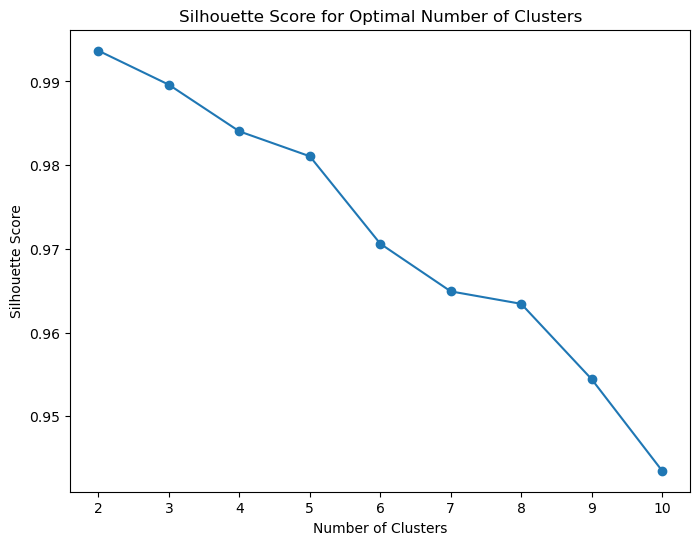

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

##### Interpretation 

* The Silhouette Score is used to evaluate the effectiveness of clustering, providing insight into the separation distance between the resulting clusters. Here's the interpretation based on the provided Silhouette Score curve:

* Peak at k=3: The silhouette scores reach their peak at k=3, indicating that the data points within the clusters are well-matched and have a good separation. This aligns with the Elbow Method's suggestion of having three clusters.

* Decrease after k=3: Beyond k=3, the silhouette scores start to decrease. This suggests that adding more clusters doesn't significantly improve the separation between clusters and may even lead to less meaningful cluster assignments.

##### Conclusion:

The Silhouette Score analysis supports the choice of k=3 as the optimal number of clusters.
It indicates that the data is well-suited for three clusters, as this configuration provides the highest silhouette scores and, therefore, the best-defined clusters.
Combining the insights from both the Elbow Method and the Silhouette Score helps to reinforce the conclusion that three clusters are appropriate for the given dataset. This information can guide the selection of the optimal number of clusters for subsequent analyses or applications.